# Map measurements on labels
In this notebook we demonstrate how [unsorted] measurements can be mapped on label images. The result is a parametric map where pixels contain the measurement from the corresponding label.

In [1]:
import numpy as np
import napari
import napari_skimage_regionprops as nsr
import pandas as pd

In [2]:
image = np.asarray([[0,1,2,3]])
labels = np.asarray([[0,1,2,3]]).astype(int)

measurements = pd.DataFrame({
    'label': [2, 3, 1, 0],
    'values': [5, 6, 7, 8]
})

# reference:
reference_map = np.asarray([[8, 7, 5, 6]])

In [3]:
viewer = napari.Viewer()

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


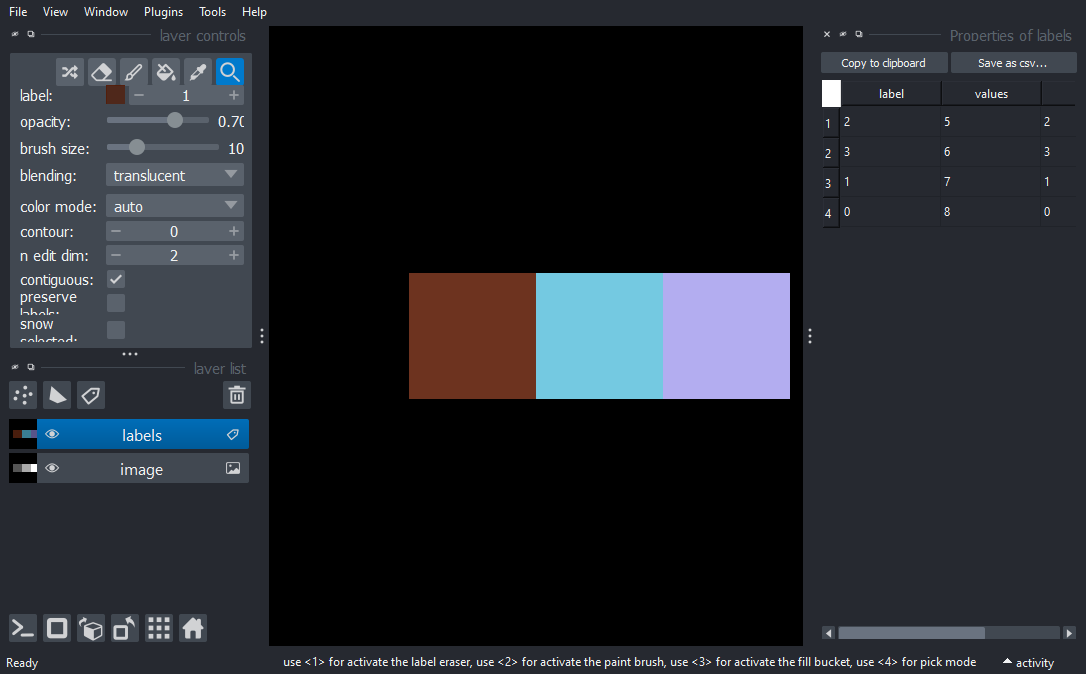

In [4]:
viewer.add_image(image)
labels_layer = viewer.add_labels(labels)
labels_layer.features = measurements

nsr.add_table(labels_layer, viewer)

napari.utils.nbscreenshot(viewer)

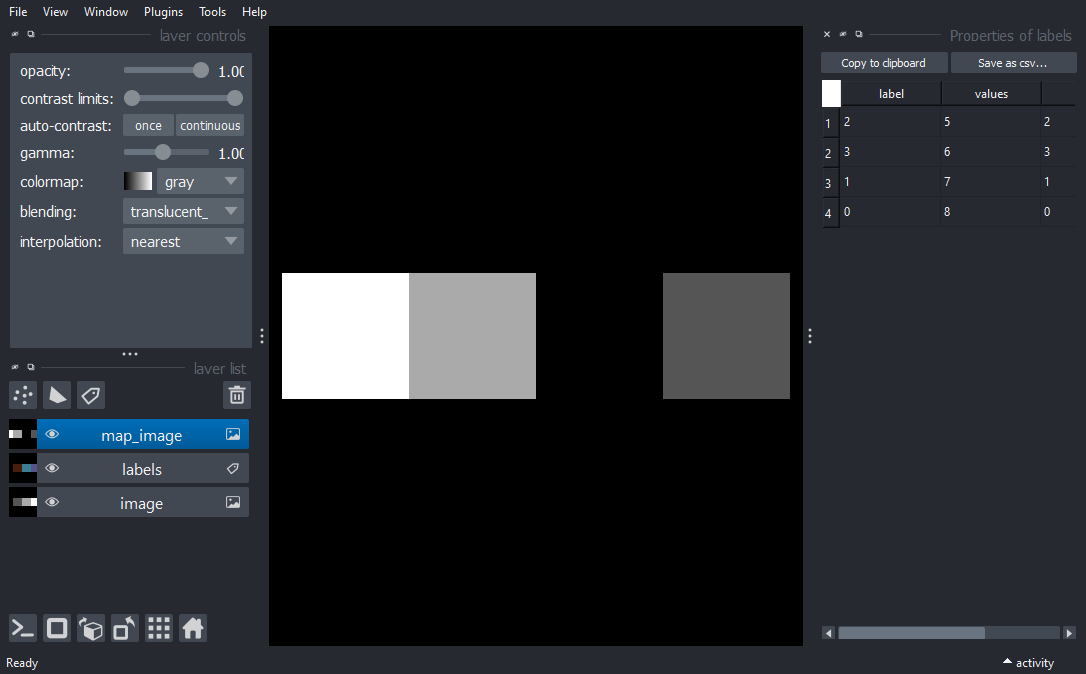

In [5]:
map_image = nsr.map_measurements_on_labels(labels_layer, 'values')

viewer.add_image(map_image)

napari.utils.nbscreenshot(viewer)

In [6]:
map_image

array([[8, 7, 5, 6]])

In [7]:
np.array_equal(map_image, reference_map)

True

## Measurements without background
The same procedure also works in case background was not measured. In that case, background will remain `0`.

In [8]:
measurements = pd.DataFrame({
    'label': [2, 3, 1],
    'values': [5, 6, 7]
})
labels_layer.features = measurements
nsr.add_table(labels_layer, viewer)

# reference:
reference_map = np.asarray([[0, 7, 5, 6]])

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


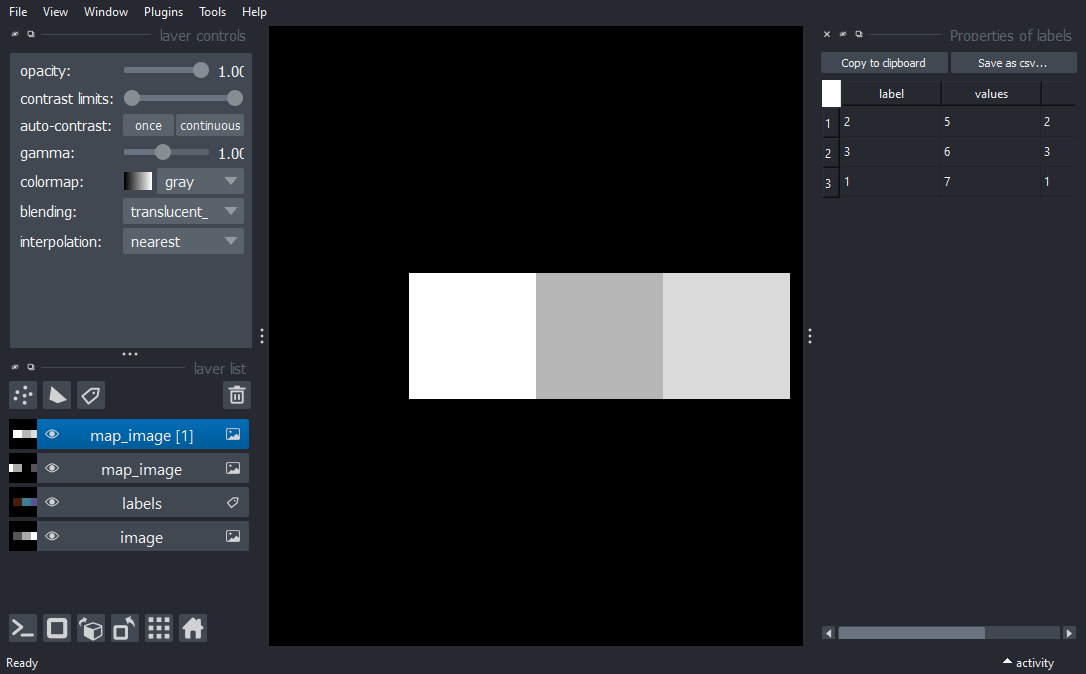

In [9]:
map_image = nsr.map_measurements_on_labels(labels_layer, 'values')

viewer.add_image(map_image)

napari.utils.nbscreenshot(viewer)

In [10]:
map_image

array([[0, 7, 5, 6]])

In [11]:
np.array_equal(map_image, reference_map)

True